## Cloth Classification using CNN by Transfer Learning

### import packages

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.applications.xception import Xception,preprocess_input,decode_predictions
import matplotlib.pyplot as plt

### Create Data generators

In [6]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_data = train_gen.flow_from_directory('train',target_size = (150,150),batch_size = 32)
val_data = val_gen.flow_from_directory('validation',target_size = (150,150),batch_size = 32,shuffle = False)
test_data = test_gen.flow_from_directory('test',target_size = (150,150),batch_size = 32,shuffle = False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


In [10]:
train_data.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [16]:
X,y = next(train_data)
X.shape

(32, 150, 150, 3)

### Initialize Pre-trained Xception Model

In [18]:
base_model = Xception(weights = 'imagenet',input_shape = (150,150,3),include_top = False)
base_model.trainable = False

2025-07-17 09:07:24.109029: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Train the Model

In [25]:
learning_rate = 0.01
inputs = keras.Input(shape = (150,150,3))
base_features = base_model(inputs,training = False)
feature_vectors = keras.layers.GlobalAveragePooling2D()(base_features)
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits = True)
outputs = keras.layers.Dense(10)(feature_vectors)
model = keras.Model(inputs,outputs)
model.compile(optimizer=optimizer,loss=loss,metrics = ['accuracy'])
history = model.fit(train_data,epochs = 10,validation_data = val_data)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 955ms/step - accuracy: 0.5837 - loss: 1.5419 - val_accuracy: 0.7625 - val_loss: 0.9005
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 937ms/step - accuracy: 0.8160 - loss: 0.5905 - val_accuracy: 0.7683 - val_loss: 0.8841
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 940ms/step - accuracy: 0.8798 - loss: 0.3334 - val_accuracy: 0.7889 - val_loss: 0.9198
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 141s 934ms/step - accuracy: 0.8924 - loss: 0.3019 - val_accuracy: 0.7801 - val_loss: 1.0672
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 933ms/step - accuracy: 0.9068 - loss: 0.2616 - val_accuracy: 0.7889 - val_loss: 1.0061
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 934ms/step - accuracy: 0.9640 - loss: 0.1095 - val_accuracy: 0.7859 - val_loss: 0.8550
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 952ms/step - accuracy: 0.9778 - loss: 0.0771 - val_accuracy: 0.8182 - val_loss: 0.8604
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 935ms/step - accuracy: 0.9901 - loss: 0.0489 - val_acc

### Analyze the accuracy curves

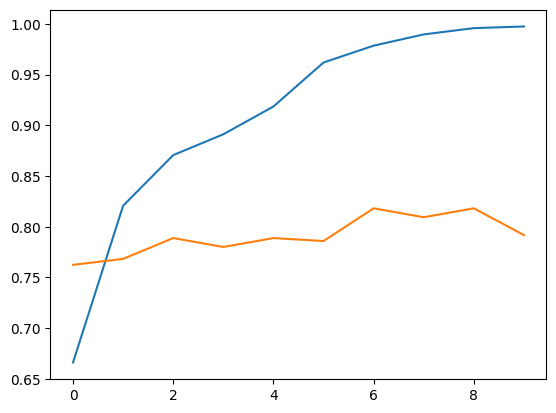

In [28]:
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'val')

In [ ]:
save_checkpoint = keras.callbacks.ModelCheckpoint(
    
)

### Tune the Hyperparameters

### Learning Rate

In [7]:
def create_model(learning_rate = 0.01):
    base_model = Xception(weights = 'imagenet',input_shape = (150,150,3),include_top = False)
    base_model.trainable = False
    inputs = keras.Input(shape = (150,150,3))
    base_features = base_model(inputs,training = False)
    feature_vectors = keras.layers.GlobalAveragePooling2D()(base_features)
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    outputs = keras.layers.Dense(10)(feature_vectors)
    model = keras.Model(inputs,outputs)
    model.compile(optimizer=optimizer,loss=loss,metrics = ['accuracy'])
    return model

In [ ]:
scores = {}
for lr in [0.001,0.01,0.1,1]:
    print(lr)
    model = create_model(learning_rate = lr)
    history = model.fit(train_data,epochs = 10,validation_data = val_data)
    scores[lr] = history.history
    print()
    print()

0.001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 96s 968ms/step - accuracy: 0.5341 - loss: 1.3985 - val_accuracy: 0.7449 - val_loss: 0.7351
Epoch 2/10


In [ ]:
for i,hist in scores.items():
    plt.plot(hist['val_accuracy'],label = f'val = {i}')
    plt.plot(hist['accuracy'],label = f'train = {i}')

### No of nodes in inner dense layer

In [ ]:
def create_model(learning_rate = 0.01,inner_nodes = 10):
    base_model = Xception(weights = 'imagenet',input_shape = (150,150,3),include_top = False)
    base_model.trainable = False
    inputs = keras.Input(shape = (150,150,3))
    base_features = base_model(inputs,training = False)
    feature_vectors = keras.layers.GlobalAveragePooling2D()(base_features)
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    inner = keras.layers.Dense(inner_nodes,activation = 'relu')(feature_vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs,outputs)
    model.compile(optimizer=optimizer,loss=loss,metrics = ['accuracy'])
    return model

In [ ]:
scores = {}
lr = 0.01
for n in [10,100,1000]:
    print(n)
    model = create_model(learning_rate = lr,inner_nodes = n)
    history = model.fit(train_data,epochs = 10,validation_data = val_data)
    scores[n] = history.history
    print()
    print()

### Regularization

In [ ]:
def create_model(learning_rate = 0.01,inner_nodes = 1,dropout_rate = 0.2):
    base_model = Xception(weights = 'imagenet',input_shape = (150,150,3),include_top = False)
    base_model.trainable = False
    inputs = keras.Input(shape = (150,150,3))
    base_features = base_model(inputs,training = False)
    feature_vectors = keras.layers.GlobalAveragePooling2D()(base_features)
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    inner = keras.layers.Dense(inner_nodes,activation = 'relu')(feature_vectors)
    dropout = keras.layers.Dropout(dropout_rate)(inner)
    outputs = keras.layers.Dense(10)(dropout)
    model = keras.Model(inputs,outputs)
    model.compile(optimizer=optimizer,loss=loss,metrics = ['accuracy'])
    return model

In [ ]:
scores = {}
lr = 0.01
for n in [0.0,0.2,0.5,0.8]:
    print(n)
    model = create_model(learning_rate = lr,hidden_num = n,dropout_rate = n)
    history = model.fit(train_data,epochs = 30,validation_data = val_data)
    scores[n] = history.history
    print()
    print()

### Data Augmentation

In [3]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
                              vertical_flip = True,
                              shear_ratio = 10.0,
                              zoon_ratio = 0.1)
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_data = train_gen.flow_from_directory('train',target_size = (150,150),batch_size = 32)
val_data = val_gen.flow_from_directory('validation',target_size = (150,150),batch_size = 32,shuffle = False)
test_data = test_gen.flow_from_directory('test',target_size = (150,150),batch_size = 32,shuffle = False)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
def create_model(learning_rate = 0.01,inner_nodes = 1,dropout_rate = 0.2):
    base_model = Xception(weights = 'imagenet',input_shape = (150,150,3),include_top = False)
    base_model.trainable = False
    inputs = keras.Input(shape = (150,150,3))
    base_features = base_model(inputs,training = False)
    feature_vectors = keras.layers.GlobalAveragePooling2D()(base_features)
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    inner = keras.layers.Dense(inner_nodes,activation = 'relu')(feature_vectors)
    dropout = keras.layers.Dropout(dropout_rate)(inner)
    outputs = keras.layers.Dense(10)(dropout)
    model = keras.Model(inputs,outputs)
    model.compile(optimizer=optimizer,loss=loss,metrics = ['accuracy'])
    return model

In [ ]:
model = create_model(learning_rate = lr,inner_nodes = n)
history = model.fit(train_data,epochs = 50,validation_data = val_data)